<a href="https://colab.research.google.com/github/TUIlmenauAMS/MRSP_Tutorials/blob/master/camera_digit_recogniser.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST Handwritten Digit Recognizer in Pytorch with Webcam Capture

## Webcam Photo capture
For later testing, this code defines a function take_photo that facilitates capturing a photo using the webcam in a Google Colab notebook and saving it as a PNG image file. This functionality is useful for tasks that require capturing images directly within the notebook environment and subsequently saving them for analysis, processing, or other purposes.

The take_photo function uses JavaScript to create an interactive user interface that displays a "Capture" button and a live video stream from the webcam. When the user clicks the "Capture" button, a snapshot is taken from the video stream, and the captured photo is converted to a PNG image using an HTML canvas.

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.png', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/png', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename


##JavaScript Setup:

A JavaScript snippet is defined inside the function to handle the webcam access, video streaming, and photo capture. It creates necessary HTML elements, such as buttons and video elements, and uses navigator.mediaDevices.getUserMedia() to request webcam access.

##Interactive User Interface:

The JavaScript code is displayed within the notebook using IPython.display and Javascript. This code sets up the user interface elements for capturing the photo.


##Capture Photo:

Upon clicking the "Capture" button, the JavaScript function captures a snapshot from the video stream using an HTML canvas. The size of the canvas is set to match the video dimensions, ensuring a high-quality image.

##Save Photo:

The captured photo is encoded as Base64 data using canvas.toDataURL('image/png', quality), where 'image/png' specifies the PNG format. The specified quality parameter determines the compression quality of the PNG image.
The Base64 data is then decoded using b64decode() from the base64 library, converting it back to binary image data.
Finally, the binary image data is saved to a PNG file with the provided filename (default: 'photo.png').

<IPython.core.display.Javascript object>

Saved to photo.png


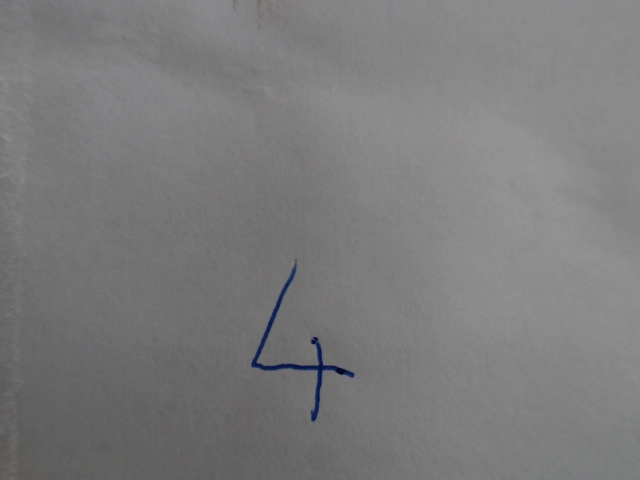

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

Using this take_photo function, we can easily capture photos from the webcam and store them as PNG images directly within the Google Colab notebook environment. This will later be use as a test image for the digit recogniser.

#Digit recogniser

This code is an implementation of a simple neural network (DenseNet) for handwritten digit recognition using the MNIST dataset. The code uses PyTorch to define and train the neural network.

First of all, import all necesary libaries:
- **numpy**: For numerical computations.
- **matplotlib.pyplot**: For plotting images.
- **torch**: The PyTorch library.
- **torchvision**: For loading the MNIST dataset and applying data transformations.
- **torch.nn.functional as F** and **torch.nn as nn**: PyTorch modules for defining and working with neural networks.

After that, define the device. This allows you to choose between 'cpu' or 'cuda' (GPU) as the device for computations. Currently, 'cpu' is selected.

In [ ]:
#from: https://machinelearningmastery.com/handwritten-digit-recognition-using-convolutional-neural-networks-python-keras/
#https://pytorch.org/docs/stable/torchvision/datasets.html#mnist
#Translated to PyTorch by Gerald Schuller, October 2019

import numpy
import matplotlib.pyplot as plt
import torch
import torchvision
import torch.nn.functional as F
import torch.nn as nn

device='cpu'
#device='cuda'

##Define the DenseNet model:

The DenseNet class is a simple neural network with two linear layers. The first layer has an input size of num_pixels and an output size of num_pixels (which is 28*28=784 for the MNIST dataset). The second layer has an input size of num_pixels and an output size of num_classes (which is 10 for the 10 digits).

The forward method defines the forward pass of the neural network, where the input x goes through the first layer, applies the ReLU activation function, and then goes through the second layer to obtain the final output.

In [ ]:
# define baseline model
class DenseNet(nn.Module):
   def __init__(self):
      super(DenseNet, self).__init__()
      self.layer1=nn.Sequential(nn.Linear(in_features=num_pixels, out_features=num_pixels))
      self.layer2=nn.Sequential(nn.Linear(in_features=num_pixels, out_features=num_classes))


   def forward(self, x):
      x = F.relu(self.layer1(x))
      x = self.layer2(x)
      #x = torch.nn.softmax(x)
      return x

##Load the MNIST dataset:

The code uses PyTorch's torchvision.datasets.MNIST to load the MNIST dataset. It downloads the dataset and applies data transformations such as converting images to tensors and normalizing pixel values.

In [ ]:
batch_size_train = 100
batch_size_test = 10
num_classes = 10

train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('~/Downloads/MNISTfiles/', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_train, shuffle=True)
#the Normalize numbers are mean and standard deviation.
test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('~/Downloads/MNISTfiles/', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_test, shuffle=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 295624275.58it/s]

Extracting /root/Downloads/MNISTfiles/MNIST/raw/train-images-idx3-ubyte.gz to /root/Downloads/MNISTfiles/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 37283993.17it/s]


Extracting /root/Downloads/MNISTfiles/MNIST/raw/train-labels-idx1-ubyte.gz to /root/Downloads/MNISTfiles/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 178834593.42it/s]

Extracting /root/Downloads/MNISTfiles/MNIST/raw/t10k-images-idx3-ubyte.gz to /root/Downloads/MNISTfiles/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 3146247.53it/s]


Extracting /root/Downloads/MNISTfiles/MNIST/raw/t10k-labels-idx1-ubyte.gz to /root/Downloads/MNISTfiles/MNIST/raw



##Plot some sample images from the training set:

The code displays four grayscale images from the MNIST training set using matplotlib.pyplot.

batch_idx= 0 X_train.shape= torch.Size([100, 1, 28, 28]) y_train.shape= torch.Size([100]) y_train= tensor([9, 3, 9, 4, 4, 9, 8, 2, 7, 3, 5, 4, 7, 7, 5, 9, 7, 8, 9, 7, 6, 0, 0, 2,
        9, 9, 2, 0, 7, 6, 2, 5, 8, 6, 7, 9, 6, 2, 0, 5, 8, 7, 4, 7, 1, 4, 4, 2,
        5, 3, 1, 0, 4, 1, 3, 3, 1, 9, 4, 0, 1, 7, 5, 1, 1, 0, 6, 7, 4, 1, 6, 7,
        2, 6, 8, 6, 2, 4, 5, 2, 1, 4, 9, 9, 0, 4, 0, 4, 5, 6, 1, 3, 7, 3, 1, 4,
        1, 1, 7, 6])


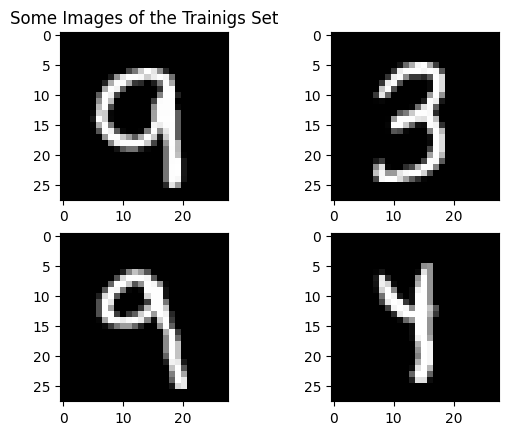

In [ ]:
examples = enumerate(train_loader)
# Plot ad hoc mnist instances

# load (downloaded if needed) the MNIST dataset
#(X_train, y_train), (X_test, y_test) = mnist.load_data()
#one batch of 100 images:
batch_idx, (X_train, y_train) = next(examples)
print("batch_idx=", batch_idx, "X_train.shape=", X_train.shape, "y_train.shape=", y_train.shape, "y_train=", y_train)
examples = enumerate(test_loader)
#one batch of 100 images:
batch_idx, (X_test, y_test) = next(examples)

# plot 4 images as gray scale
plt.subplot(221)
plt.title("Some Images of the Trainigs Set")
plt.imshow(X_train[0,0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1,0], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2,0], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3,0], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

##Prepare the data:

The images in the dataset are flattened to vectors of size num_pixels (784) using the view and reshape methods.
Pixel values are normalized from the range [0, 255] to [0, 1].

In [ ]:
X_testunflat=X_test.clone() #keep original for imshow later
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[2] * X_train.shape[3]


#Flatten the images:
X_train = X_train.view(X_train.shape[0], num_pixels)
print("X_train.shape=",X_train.shape)
X_test = X_test.reshape(X_test.shape[0], num_pixels)
print("X_test.shape=",X_test.shape)

# normalize inputs from 0-255 to 0-1
#X_train = X_train / 255
#X_test = X_test / 255

# one hot encode outputs
#y_train = np_utils.to_categorical(y_train)
#y_test = np_utils.to_categorical(y_test)


X_train.shape= torch.Size([100, 784])
X_test.shape= torch.Size([10, 784])


##Define the loss function and optimizer:

The code uses CrossEntropyLoss as the loss function, which is commonly used for multiclass classification problems.

The Adam optimizer is used to update the model parameters during training.

In [ ]:
# build the model
#print("Generate Model:")
model = DenseNet()#.to('cpu')

loss_fn = nn.CrossEntropyLoss()
#learning_rate = 1e-4
optimizer = torch.optim.Adam(model.parameters())#, lr=learning_rate)


##Train the model:

The model is trained for 10 epochs.
In each epoch, the model performs forward and backward passes on the training data, calculates the loss, and updates the model parameters using the optimizer.

In [ ]:
# Fit the model
X_train=X_train.to(device)
y_train=y_train.to(device)
for epoch in range(10):
       Ypred=model(X_train)
       loss=loss_fn(Ypred, y_train)
       if epoch%2==0:
          print(epoch, loss.item())
       optimizer.zero_grad()
       loss.backward()
       optimizer.step()

# Save the trained model
torch.save(model.state_dict(), 'mnist_model.pth')

0 2.331002950668335
2 1.1911568641662598
4 0.5731756091117859
6 0.27949246764183044
8 0.13190162181854248


##Evaluate the model:

After training, the model is tested on the test dataset.
The loss on the test set is calculated using the CrossEntropyLoss.

In [ ]:
#model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2, batch_size=200, verbose=2)
# Final evaluation of the model
Ypred=model(X_test)
loss=loss_fn(Ypred, y_test)
#scores = model.forward(X_test, y_test, verbose=0)
print("Loss on the test set:", loss)

Loss on the test set: tensor(1.8526, grad_fn=<NllLossBackward0>)


##Make a prediction and visualize the result:

A single test image is chosen to make a prediction using the trained model.
The image is plotted using matplotlib.pyplot.
The model's prediction for the image is obtained using torch.argmax, which returns the index of the highest value in the output (representing the predicted digit).


sample.shape= torch.Size([784])
prediction= tensor(4)


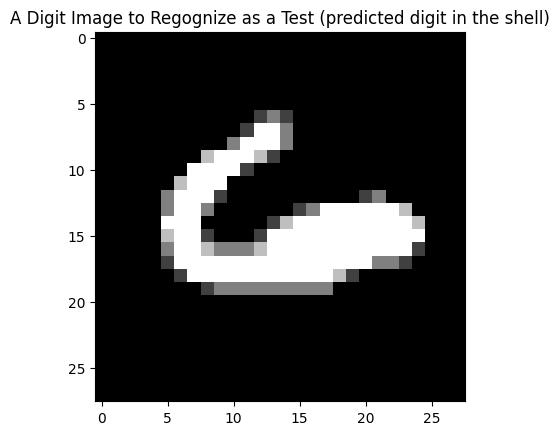

In [ ]:
plt.imshow(X_testunflat[1,0], cmap=plt.get_cmap('gray'))
plt.title("A Digit Image to Regognize as a Test (predicted digit in the shell)")

sample=X_test[1,:]
print("sample.shape=", sample.shape)
prediction=torch.argmax(model(sample))
print("prediction=", prediction)

plt.show()

#Loading and Using the Trained Model for Handwritten Digit Recognition

This is an additional implementation that uses the previously trained DenseNet model for handwritten digit recognition on our camera input image taken above. The code takes an input image, preprocesses it to match the format expected by the model, and then uses the model to predict the digit in the image.

##Import the necessary libraries:

**cv2**: OpenCV, used for reading and preprocessing the input image.

##Load the previously trained model:

A DenseNet model is instantiated.
The model's state dictionary is loaded from the file 'mnist_model.pth' using torch.load().
The model is set to evaluation mode using model.eval(), which ensures that dropout and batch normalization layers work in inference mode.

In [ ]:
import cv2

# Load the previously trained model
model = DenseNet()
model.load_state_dict(torch.load('mnist_model.pth'))
model.eval()

DenseNet(
  (layer1): Sequential(
    (0): Linear(in_features=784, out_features=784, bias=True)
  )
  (layer2): Sequential(
    (0): Linear(in_features=784, out_features=10, bias=True)
  )
)

##Define the preprocess_input_image function:

The purpose of this function is to apply transforms to the camera captured image such that it has the same format (28x28 pixels, black and white, white ink, black background), transformations and normalizations (for brightness and contrast) as the models training set.

There are 2 versions of the function, one using OpenCV and the other using Pytorch and PIL (Pillow Image Library). The OpenCV function takes the path to an input image as input.
The image is read using OpenCV's **cv2.imread** function, specifying that it should be read in grayscale (**cv2.IMREAD_GRAYSCALE**).

The image is resized to a size of 28x28, which is the size expected by the MNIST model.
The image is then converted to a PyTorch tensor using torch.tensor, and its shape is modified to be (1, -1), where the first dimension represents the batch size (1 in this case) and the second dimension is inferred based on the size of the original image.

The pixel values of the image are normalized to be in the range [0, 1] by dividing the tensor by 255.0 (assuming the original pixel values were in the range [0, 255]).
The preprocessed image tensor is returned.

The different pre-processing functions can be tried by selecting the function in the next cells code, and also differen pre-processing steps can be activated or deactivated in the next code cells pre-processing functions, to see their success or failure with recognizing your captured digit image.

Observe how much the recognition success depends on this pre-processing!

In [ ]:
# Function to preprocess the input image
def preprocess_input_image(image_path):
    # Read the image in grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Resize the image to 28x28 (MNIST image size)
    img = cv2.resize(img, (28, 28))

    # Convert the image to a PyTorch tensor
    img_tensor = torch.tensor(img).view(1, -1)

    # Normalize the pixel values to be in the range [0, 1]
    img_tensor = img_tensor.float() / 255.0

    return img_tensor

In [ ]:
import torch
from PIL import Image
from torchvision import transforms

def preprocess_image(image_path):
    # Open the image file
    image = Image.open(image_path).convert("L")  # Convert to grayscale
    #image = torchvision.transforms.functional.equalize(image) #apply histogram equalization to improve image
    image = torchvision.transforms.functional.invert(image) #invert image to make it white on black
    # Define the transformation pipeline
    transform = transforms.Compose([
        transforms.Resize((28, 28)),  # Resize the image to 28x28
        transforms.ToTensor(),  # Convert the PIL image to a PyTorch tensor
        #transforms.Normalize((0.1307,), (0.3081,))  # Normalize the image, important because of the non-linearities in neural networks.
        #(Normalize is somehow not working properly)
    ])

    # Apply the transformation pipeline to the image and map it to dimension 0:
    preprocessed_image = transform(image).unsqueeze(0)

    #Apply thresholding:
    """
    preprocessed_image = preprocessed_image > torch.mean(preprocessed_image)+1.5*torch.std(preprocessed_image)
    preprocessed_image = preprocessed_image.float()
    """

    #Normalize explicitely to obtain mean=0.1307 and std=0.3081:
    mean=torch.mean(preprocessed_image)
    std=torch.std(preprocessed_image)
    preprocessed_image=(preprocessed_image-mean)/std*0.3081+0.1307

    print("torch.mean(preprocessed_image)=", torch.mean(preprocessed_image))
    print("torch.std(preprocessed_image)= ", torch.std(preprocessed_image))

    #plt.imshow(preprocessed_image[0,0,:,:], cmap='gray')
    #plt.title("Preprocessed Image")
    #plt.show()
    print("preprocessed_image.shape",preprocessed_image.shape) #torch.Size([1, 1, 28, 28])
    preprocessed_image = preprocessed_image.view(1,-1) #flatten image with view()
    print("After view(), preprocessed_image.shape",preprocessed_image.shape) #torch.Size([1, 784])
    #print(preprocessed_image)

    return preprocessed_image

##Define the recognize_digit function:

This function takes the path to an input image and the trained model as inputs.
The preprocess_input_image function is called to preprocess the input image.
The preprocessed image tensor is then fed to the model to obtain the model's output using the model object. Since this is an inference step, we use torch.no_grad() to disable gradient computation, as we don't need it during inference.

The digit prediction is obtained by finding the index of the maximum value in the model's output tensor using torch.argmax.
The predicted digit (as an integer) is returned.

In [ ]:
# Function to recognize the digit
def recognize_digit(image_path, model):
    # Preprocess the input image
    #input_image = preprocess_input_image(image_path) #using openCV
    input_image = preprocess_image(image_path)  #using pytorch
    print("recognizer input_image.shape",input_image.shape)

    plt.imshow(input_image.view(28,28), cmap='gray')
    plt.title("Preprocessed Image")
    plt.show()
    # Get the prediction from the model
    with torch.no_grad():
        model_output = model(input_image)
        predicted_digit = torch.argmax(model_output)

    return predicted_digit.item()

##Set the input_image_path:

The variable input_image_path is set to the path of the input image that you want to recognize.

##Recognize the digit and display the input image and the prediction:

The code calls the recognize_digit function with the input_image_path and the loaded model to predict the digit in the input image.
The input image is displayed using cv2.imread and matplotlib.pyplot.imshow in grayscale (cmap='gray').
The predicted digit is displayed as the title of the plot using matplotlib.pyplot.title.
The plot is shown using matplotlib.pyplot.show().

torch.mean(preprocessed_image)= tensor(0.1307)
torch.std(preprocessed_image)=  tensor(0.3081)
preprocessed_image.shape torch.Size([1, 1, 28, 28])
After view(), preprocessed_image.shape torch.Size([1, 784])
recognizer input_image.shape torch.Size([1, 784])


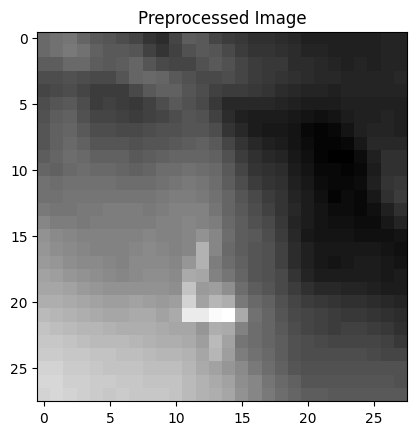

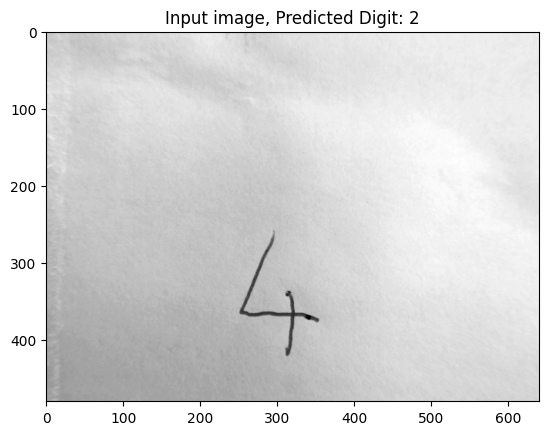

In [ ]:
# Input image path
input_image_path = 'photo.png'

# Recognize the digit
predicted_digit = recognize_digit(input_image_path, model)


# Display the input image and the predicted digit
input_image = cv2.imread(input_image_path, cv2.IMREAD_GRAYSCALE)
plt.imshow(input_image, cmap='gray')
plt.title(f"Input image, Predicted Digit: {predicted_digit}")
plt.show()
